In [23]:
#!/usr/bin/env python
import numpy as np
import pprint as pp
from preprocess import input_to_target, plot_mel_spectrogram, plot_time_amplitude, load_audio_feature
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 
import os
import pandas as pd

In [24]:
class Opts():
    def __init__(self):
        self.sr = 16000 #Sampling rate for audio samples
        self.batch_size = 32
        self.audio_duration = 4
        self.data_path = "./data/"
        self.plot_path = "./plot/"
        self.csv_path = "./meta"
opts = Opts()

In [3]:
def _gen_dataset(df, opts):
    X, y = None, []
    for file_path, label in zip(df['file_paths'], df['labels']):
        mfccs, chroma, mel, contrast = load_audio_feature(file_path, opts)
        # print("S.shape:" + str(S.shape))
        if X is None:
            X = np.hstack([mfccs, chroma, mel, contrast])
        else:
            X = np.vstack([X, np.hstack([mfccs, chroma, mel, contrast])])
        y += [label]
    # assert(X.shape[1] == len(y))
    return np.array(X), np.array(y)


In [11]:
class SVMModel():
    def __init__(self, opts):
        self.svc = SVC(C=28.0, gamma = 0.00001, decision_function_shape="ovr")

    def run(self, X_train, y_train):
        self.svc.fit(X_train, y_train)

    # predict results with the trained SVC classifier
    def predict(self, X_test):
        return self.svc.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        print("y_pred:"+str(y_pred))
        confusion = confusion_matrix(y_test,y_pred)
        classi = classification_report(y_test,y_pred)
        acc = self.svc.score(X_test, y_test)
        return confusion, classi, acc

In [25]:
def df_from_csv(csv_path):
    df = pd.read_csv(csv_path)
    return df
train_csv_path = os.path.join(opts.csv_path, "train.csv")
test_csv_path = os.path.join(opts.csv_path, "test.csv")

train_file_df, test_file_df = df_from_csv(train_csv_path), df_from_csv(test_csv_path)

In [26]:

# Pretty print the run args
pp.pprint(vars(opts))

X_train, y_train = _gen_dataset(train_file_df, opts)
print("Train dataset size = {:s}".format(str(X_train.shape)))
print("Train label size = {:s}".format(str(y_train.shape)))
X_test, y_test = _gen_dataset(test_file_df, opts)
print("Test dataset size = {:s}".format(str(X_test.shape)))


{'audio_duration': 4,
 'batch_size': 32,
 'csv_path': './meta',
 'data_path': './data/',
 'plot_path': './plot/',
 'sr': 16000}


/Users/candydong/anaconda/lib/python3.6/site-packages/librosa/core/pitch.py:146: UserWarning:

Trying to estimate tuning from empty frequency set.



Train dataset size = (1761, 187)
Train label size = (1761,)
Test dataset size = (925, 187)


In [27]:
svm = SVMModel(opts)
svm.run(X_train, y_train)
confusion_matrix, classification_report, acc = svm.evaluate(X_test, y_test)
print("confusion_matrix:")
print(str(confusion_matrix))
print("classification_report:")
print(str(classification_report))
print("accuracy={:0.3f}".format(acc))


y_pred:[3 3 0 7 3 6 3 0 2 2 4 4 1 6 9 7 7 0 6 4 2 0 9 8 8 8 0 3 4 7 4 4 3 3 8 8 8
 9 0 4 2 7 7 3 6 2 4 4 5 4 2 4 7 0 3 3 0 2 3 5 0 2 4 3 6 2 4 0 4 9 2 7 8 8
 8 7 5 4 7 0 0 3 8 8 6 8 8 7 2 9 4 0 7 4 6 2 4 2 6 7 2 3 3 6 2 3 2 0 3 4 4
 2 9 6 2 3 4 7 4 7 3 7 6 2 4 2 2 4 2 2 6 9 4 0 2 8 8 3 3 8 8 3 3 8 8 2 0 9
 6 4 2 4 6 4 2 2 4 2 2 6 6 3 3 2 7 4 9 2 7 7 3 4 4 4 1 9 4 7 9 6 7 9 0 7 3
 4 9 6 3 4 0 2 2 6 2 9 0 9 3 8 5 2 6 8 4 9 9 1 0 9 9 6 8 4 5 8 0 3 6 2 2 3
 9 4 3 2 6 3 7 0 3 3 6 2 3 7 0 6 2 8 2 7 2 8 3 4 5 8 6 7 9 2 9 2 7 4 8 2 7
 5 4 3 3 2 9 9 1 9 9 9 6 9 9 1 3 4 4 4 2 9 2 3 4 5 7 9 7 2 8 7 4 2 4 8 3 3
 3 3 7 6 7 2 2 7 2 8 4 2 7 3 2 8 7 7 6 8 9 2 2 4 4 1 3 3 9 4 5 3 9 4 9 4 2
 2 3 4 8 2 2 9 2 9 3 2 9 3 7 8 4 2 2 3 8 2 2 9 3 3 7 2 1 3 8 2 9 9 2 5 7 2
 3 7 9 1 7 3 6 9 9 9 2 7 1 3 9 3 3 6 1 3 2 7 1 9 8 3 1 8 9 9 3 9 2 2 4 3 3
 7 6 4 5 9 4 3 2 5 9 9 7 7 9 7 9 4 7 3 7 2 8 4 3 9 1 9 9 9 9 1 4 9 2 8 3 6
 7 9 9 2 4 2 7 2 7 2 7 9 4 9 6 8 3 3 9 9 3 2 2 2 3 9 7 6 4 8 9 7 7 3 7 9 2
 9 8 8 2 3 4 9 3 3

In [29]:
def plot_confusion_matrix(cm,
                          target_names,
                          opts,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions
    Usage
        -----
        plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                                  # sklearn.metrics.confusion_matrix
                              normalize    = True,                # show proportions
                              target_names = y_labels_vals,       # list of names of the classes
                              title        = best_estimator_name) # title of graph

        Citiation
        ---------
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

        """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Purples')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig(os.path.join(opts.plot_path, title), bbox_inches='tight')
    plt.show()

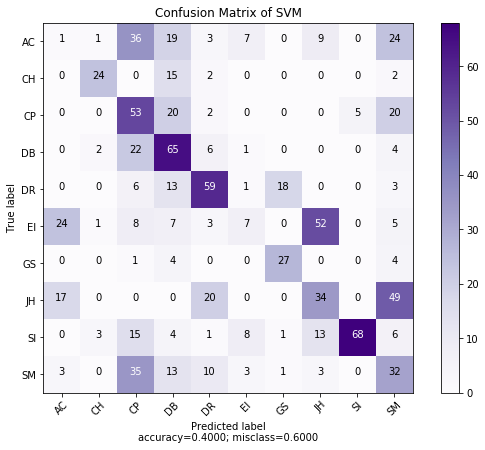

In [31]:
labels = ['AC', 'CH', 'CP', 'DB', 'DR', 'EI', 'GS', 'JH', 'SI', 'SM']
plot_confusion_matrix(confusion_matrix, 
                      labels,
                      opts,
                      normalize = False,
                      title = "Confusion Matrix of SVM")